In [38]:

!pip install Bio
!pip install logomaker
!pip install pymsaviz

import pandas as pd
import sys
import os
import time
import argparse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.ion()

import logomaker as lm

from collections import Counter,defaultdict
from numpy import log
from Bio import AlignIO
from Bio import PDB

import numpy as np  # Import numpy for initialization

align = AlignIO.read("c:\\Users\\Filippo\\Desktop\\BioinformaticsPmmo\\AligmentMega.fas", "fasta")

from pymsaviz import MsaViz, get_msa_testdata
msa_file = open('AligmentMega.fas')

def frequency(align):
    # Create an empty DataFrame with columns for amino acids
    amino_acids = ['-']
    df = pd.DataFrame(columns=amino_acids, data=np.zeros((len(align[0]), len(amino_acids))))

    # Iterate through the alignment and count amino acids at each position
    for a in range(len(align[0])):
        for x in align[:, a]:
            if x in amino_acids:
                df.at[a, x] += 1
            else:
                # Add new amino acid to the DataFrame
                amino_acids.append(x)
                df[x] = 0
                df.at[a, x] = 1
    
    #changes the index in order that the first aa is actually 1
    df.index = df.index + 1

    return df

# Example usage (assuming 'align' is a valid MSA)
frequency_table = frequency(align)
frequency_table_2 = frequency(align)
# Iterate through each row to find the most frequent amino acid and its frequency percentage
most_frequent_amino_acids = []
identity = []

for index, row in frequency_table.iterrows():
    most_frequent_amino_acid = row.idxmax()
    most_frequent_count = row.max()
    total_count = row.sum()
    
    if most_frequent_amino_acid == "-":
        identity_percentage = 0
    else:
        identity_percentage = (most_frequent_count / total_count) * 100

    if identity_percentage<80 :
       identity_percentage = 0
        
    most_frequent_amino_acids.append(most_frequent_amino_acid)
    identity.append(identity_percentage)
    
# Add new columns for the most frequent amino acid and its frequency percentage
frequency_table['MostFrequentAminoAcid'] = most_frequent_amino_acids
frequency_table['FrequencyPercentage'] = identity

print(frequency_table)

# Load the PDB file
#parser = PDB.PDBParser(QUIET=True)
#structure = parser.get_structure("my_protein", "c:\\Users\\Filippo\\Desktop\\BioinformaticsPmmo\\3rgb666.pdb")
# Add frequency values as REMARK records

# Iterate through the structure and assign frequency values
#i = 0  # Initialize the frequency index
#for model in structure:
#    for chain in model:
#        for residue in chain:
            # Set the full identifier for the residue
#            residue.full_id = (' ', chain.id, ' ', (' ', residue.id[1], ' '))
            # Set the B-factor as a representation of frequency
#            for atom in residue:
#                atom.set_bfactor(identity[i])
#            i += 1

# Save the modified structure to a new PDB file
#io = PDB.PDBIO()
#io.set_structure(structure)
#io.save("c:\\Users\\Filippo\\Desktop\\BioinformaticsPmmo\\modified_color.pdb")


mv = MsaViz(msa_file, wrap_length=60, show_grid=True, show_consensus=True)
fig = mv.plotfig()


         -  J  K  N  L  I   G   M  R  S  ...   D  Q  E   A  C  W   P  X  \
1    546.0  1  1  0  0  0   0   0  0  0  ...   0  0  0   0  0  0   0  0   
2    547.0  0  0  1  0  0   0   0  0  0  ...   0  0  0   0  0  0   0  0   
3    547.0  0  0  0  1  0   0   0  0  0  ...   0  0  0   0  0  0   0  0   
4    547.0  0  0  0  0  1   0   0  0  0  ...   0  0  0   0  0  0   0  0   
5    547.0  0  1  0  0  0   0   0  0  0  ...   0  0  0   0  0  0   0  0   
..     ... .. .. .. .. ..  ..  .. .. ..  ...  .. .. ..  .. .. ..  .. ..   
483  435.0  0  7  0  3  0  24   0  0  0  ...  10  4  0  63  0  0   1  0   
484  438.0  0  0  0  0  0  70   0  0  0  ...   0  0  0  14  0  0  10  0   
485  481.0  0  0  0  0  0   8   0  0  0  ...  49  0  0   3  0  0   0  0   
486  502.0  0  0  0  0  0   0  39  0  0  ...   0  6  0   0  0  0   0  0   
487  502.0  0  0  0  0  0   0   6  0  0  ...   0  0  0   0  0  0  40  0   

     MostFrequentAminoAcid  FrequencyPercentage  
1                        -                  0.0  

ValueError: Image size of 840x99749 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x000002BC31AAC7C0> (for post_execute):


ValueError: Image size of 840x99749 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 840x99750 with 0 Axes>

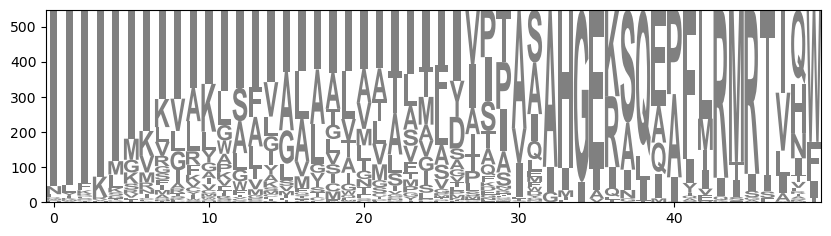

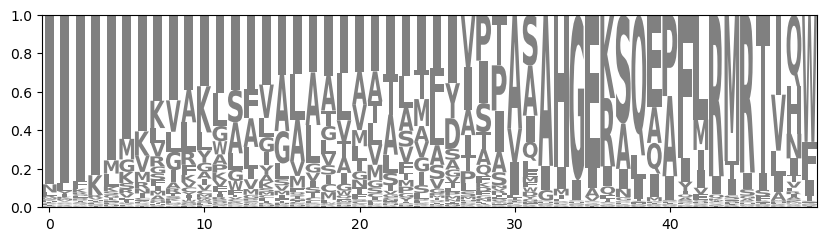

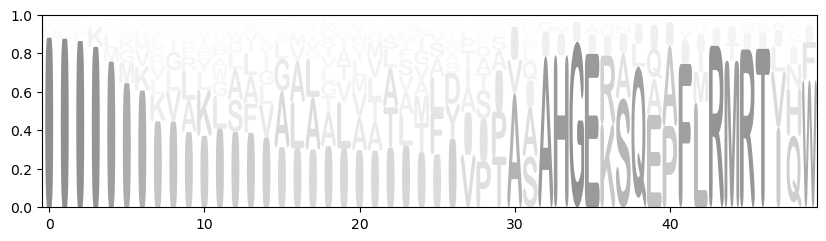

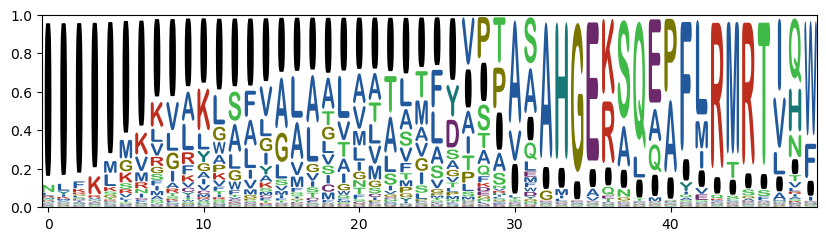

In [5]:
# trim matrix and sequence
start = 10
stop = 60
ars_df = frequency_table_2.iloc[start:stop, :]
ars_df.reset_index(inplace=True, drop=True)
ars_seq = frequency_table_2[start:stop]

# create Logo object
ars_logo = lm.Logo(ars_df,font_name='Arial')

prob_mat = lm.transform_matrix(ars_df, from_type='counts', to_type='probability')
logo = lm.Logo(prob_mat)
ogo = lm.Logo(prob_mat, 
               fade_probabilities=True,
               stack_order='small_on_top',
               font_name='Arial Rounded MT Bold')
logo = lm.Logo(prob_mat, font_name = 'Arial Rounded MT Bold',
                         color_scheme='NajafabadiEtAl2017',
                         vpad=.1,
                         width=.8)

In [77]:
# Initialize indices for accessing frequency values
i = 0

# Iterate through the structure and assign frequency values
i = 0  # Initialize the frequency index
for model in structure:
    for chain in model:
        for residue in chain:
            # Set the full identifier for the residue
            residue.full_id = (' ', chain.id, ' ', (' ', residue.id[1], ' '))
            # Set the B-factor as a representation of frequency
            for atom in residue:
                atom.set_bfactor(frequency_values[i])
            i += 1


# Save the modified structure to a new PDB file
io = PDB.PDBIO()
io.set_structure(structure)
io.save("c:\\Users\\Filippo\\Desktop\\BioinformaticsPmmo\\modified_color.pdb")

NameError: name 'frequency_values' is not defined

In [34]:
print(prob_mat)

            -         A         C         D         E         F         G  \
pos                                                                         
0    0.880911  0.001751  0.001751  0.001751  0.001751  0.001751  0.001751   
1    0.875657  0.001751  0.001751  0.001751  0.001751  0.003503  0.001751   
2    0.863398  0.001751  0.001751  0.007005  0.001751  0.040280  0.008757   
3    0.833625  0.001751  0.001751  0.001751  0.001751  0.001751  0.003503   
4    0.756567  0.001751  0.001751  0.001751  0.005254  0.003503  0.015762   
5    0.644483  0.001751  0.001751  0.001751  0.001751  0.001751  0.064799   
6    0.605954  0.005254  0.010508  0.001751  0.001751  0.007005  0.001751   
7    0.446585  0.021016  0.001751  0.001751  0.001751  0.028021  0.036778   
8    0.444834  0.031524  0.001751  0.001751  0.001751  0.008757  0.096322   
9    0.390543  0.168126  0.024518  0.001751  0.001751  0.052539  0.005254   
10   0.371278  0.036778  0.019264  0.001751  0.001751  0.003503  0.045534   

In [62]:
frequency_table['FrequencyPercentage']

1      99.635036
2      99.817518
3      99.817518
4      99.817518
5      99.817518
         ...    
483    79.379562
484    79.927007
485    87.773723
486    91.605839
487    91.605839
Name: FrequencyPercentage, Length: 487, dtype: float64

In [82]:
# Load the PDB file
parser = PDB.PDBParser(QUIET=True)
structure = parser.get_structure("my_protein", "c:\\Users\\Filippo\\Desktop\\BioinformaticsPmmo\\3rgb666.pdb")
# Add frequency values as REMARK records

# Iterate through the structure and assign frequency values
i = 0  # Initialize the frequency index
for model in structure:
    for chain in model:
        for residue in chain:
            # Set the full identifier for the residue
            residue.full_id = (' ', chain.id, ' ', (' ', residue.id[1], ' '))
            # Set the B-factor as a representation of frequency
            for atom in residue:
                atom.set_bfactor(identity[i])
            i += 1

# Save the modified structure to a new PDB file
io = PDB.PDBIO()
io.set_structure(structure)
io.save("c:\\Users\\Filippo\\Desktop\\BioinformaticsPmmo\\modified_color.pdb")

In [80]:
print(identity)

[99.63503649635037, 99.81751824817519, 99.81751824817519, 99.81751824817519, 99.81751824817519, 99.81751824817519, 99.81751824817519, 98.17518248175182, 95.8029197080292, 92.15328467153284, 91.6058394160584, 91.05839416058394, 89.78102189781022, 86.67883211678831, 78.64963503649635, 66.97080291970804, 62.95620437956204, 46.35036496350365, 46.167883211678834, 40.51094890510949, 38.503649635036496, 42.33576642335766, 40.51094890510949, 40.14598540145985, 37.591240875912405, 32.299270072992705, 31.751824817518248, 31.02189781021898, 32.846715328467155, 31.569343065693428, 30.656934306569344, 30.474452554744524, 31.934306569343068, 33.21167883211679, 29.56204379562044, 28.467153284671532, 36.86131386861314, 28.284671532846716, 24.635036496350367, 27.189781021897808, 61.496350364963504, 27.37226277372263, 81.56934306569343, 82.11678832116789, 89.41605839416059, 82.84671532846716, 44.89051094890511, 58.75912408759124, 75.91240875912408, 49.81751824817518, 43.79562043795621, 77.37226277372264

In [81]:
len(identity)

487

In [90]:
from __future__ import print_function

from pymol import *
from math import *
from pymol import cmd
import re


def spectrumbar(*args, **kwargs):
    """
    Author Sean M. Law
    University of Michigan
    seanlaw_(at)_umich_dot_edu

    USAGE

    While in PyMOL

    run spectrumbar.py

    spectrumbar (RGB_Colors,radius=1.0,name=spectrumbar,head=(0.0,0.0,0.0),tail=(10.0,0.0,0.0),length=10.0, ends=square)

    Parameter     Preset         Type     Description
    RGB_Colors    [1.0,1.0,1.0]  N/A      RGB colors can be specified as a
                                          triplet RGB value or as PyMOL
                                          internal color name (i.e. red)
    radius        1.0            float    Radius of cylindrical spectrum bar
    name          spectrumbar    string   CGO object name for spectrum bar
    head          (0.0,0.0,0.0)  float    Starting coordinate for spectrum bar
    tail          (10.0,0.0,0.0) float    Ending coordinate for spectrum bar
    length        10.0           float    Length of spectrum bar
    ends          square         string   For rounded ends use ends=rounded

    Examples:

    spectrumbar red, green, blue
    spectrumbar 1.0,0.0,0.0, 0.0,1.0,0.0, 0.0,0.0,1.0

    The above two examples produce the same spectrumbar!

    spectrumbar radius=5.0
    spectrumbar length=20.0

    """

    rgb = [1.0, 1.0, 1.0]
    name = "spectrumbar"
    radius = 1.0
    ends = "square"
    x1 = 0
    y1 = 0
    z1 = 0
    x2 = 10
    y2 = 0
    z2 = 0
    num = re.compile('[0-9]')
    abc = re.compile('[a-z]')

    for key in kwargs:
        if (key == "radius"):
            radius = float(kwargs["radius"])
        elif (key == "name"):
            name = kwargs["name"]
        elif (key == "head"):
            head = kwargs["head"]
            head = head.strip('" []()')
            x1, y1, z1 = list(map(float, head.split(',')))
        elif (key == "tail"):
            tail = kwargs["tail"]
            tail = tail.strip('" []()')
            x2, y2, z2 = list(map(float, tail.split(',')))
        elif (key == "length"):
            if (abc.search(kwargs["length"])):
                print("Error: The length must be a value")
                return
            else:
                x2 = float(kwargs["length"])
        elif (key == "ends"):
            ends = kwargs["ends"]
        elif (key != "_self"):
            print("Ignoring unknown option \"" + key + "\"")
        else:
            continue

    args = list(args)
    if (len(args) >= 1):
        rgb = []
    while (len(args) >= 1):
        if (num.search(args[0]) and abc.search(args[0])):
            if (str(cmd.get_color_tuple(args[0])) != "None"):
                rgb.extend(cmd.get_color_tuple(args.pop(0)))
            else:
                return
        elif (num.search(args[0])):
            rgb.extend([float(args.pop(0))])
        elif (abc.search(args[0])):
            if (str(cmd.get_color_tuple(args[0])) != "None"):
                rgb.extend(cmd.get_color_tuple(args.pop(0)))
            else:
                return
        else:
            print("Error: Unrecognized color format \"" + args[0] + "\"")
            return

    if (len(rgb) % 3):
        print("Error: Missing RGB value")
        print("Please double check RGB values")
        return

    dx = x2 - x1
    dy = y2 - y1
    dz = z2 - z1
    if (len(rgb) == 3):
        rgb.extend([rgb[0]])
        rgb.extend([rgb[1]])
        rgb.extend([rgb[2]])
    t = 1.0 / (len(rgb) / 3.0 - 1)
    c = len(rgb) / 3 - 1
    s = 0
    bar = []

    while (s < c):
        if (len(rgb) > 0):
            r = rgb.pop(0)
            g = rgb.pop(0)
            b = rgb.pop(0)
        if (s == 0 and ends == "rounded"):
            bar.extend([COLOR, float(r), float(g), float(b), SPHERE, x1 + (s * t) * dx, y1 + (s * t) * dy, z1 + (s * t) * dz, radius])
        bar.extend([CYLINDER])
        bar.extend([x1 + (s * t) * dx, y1 + (s * t) * dy, z1 + (s * t) * dz])
        bar.extend([x1 + (s + 1) * t * dx, y1 + (s + 1) * t * dy, z1 + (s + 1) * t * dz])
        bar.extend([radius, float(r), float(g), float(b)])
        if (len(rgb) >= 3):
            bar.extend([float(rgb[0]), float(rgb[1]), float(rgb[2])])
            r = rgb[0]
            g = rgb[1]
            b = rgb[2]
        else:
            bar.extend([float(r), float(g), float(b)])
        if (s == c - 1 and ends == "rounded"):
            bar.extend([COLOR, float(r), float(g), float(b), SPHERE, x1 + (s + 1) * t * dx, y1 + (s + 1) * t * dy, z1 + (s + 1) * t * dz, radius])
        s = s + 1

    cmd.delete(name)
    cmd.load_cgo(bar, name)

    return
cmd.extend("spectrumbar", spectrumbar)

ModuleNotFoundError: No module named 'pymol'

In [7]:
!pip install pymsaviz
conda install -c conda-forge -c bioconda pymsaviz

In [32]:
conda install -c conda-forge -c bioconda pymsaviz

^C

Note: you may need to restart the kernel to use updated packages.


In [14]:
mv = MsaViz(prob_mat, wrap_length=60, show_count=True)
mv.savefig("api_example01.png")

NameError: name 'MsaViz' is not defined

In [22]:
from pymsaviz import MsaViz, get_msa_testdata
msa_file = "c:\\Users\\Filippo\\Desktop\\BioinformaticsPmmo\\AligmentMega.fas", "fasta")
msa_file = align
mv = MsaViz(msa_file, wrap_length=60, show_count=True)
mv.savefig("api_example01.png")


ValueError: Image size of 840x99120 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x000002BC31AAC7C0> (for post_execute):


ValueError: Image size of 840x99120 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 840x99120 with 0 Axes>

In [20]:
show align

SyntaxError: invalid syntax (875938069.py, line 1)

In [21]:
print(align)

Alignment with 548 rows and 487 columns
J-------------MKKLVKLAAFGAAAAVAATLGA-IAPASAH...DMP AAF37897.1:1-419
--------------MKKLVKLAAFGAAAAVAATLGA-VAPASAH...DMP WP_202074342.1:1-419
--------------MKKLVKLAAFGAAAAVAATLGA-VAPASAH...DMP WP_165050362.1:1-419
--------------MKKLVKLAAIGAAAAVAATLGA-VAPASAH...DMP WP_281800360.1:1-419
--------------MKKLVKLAALGAAAAVAATLGA-IAPASAH...DMP WP_026016564.1:1-419
--------------MKKLVKLAAFGAAAAVAATLGA-VAPASAH...DMP WP_036287217.1:1-420
-------------------------------------------H...--- 7S4M_A:1-388
--------------MRNLVKLAAVG-AAAVVATLGA-IAPASAH...DMP WP_136495620.1:1-419
--------------MKKFVKLAAIGAAAAVAATLGA-VAPASAH...DMP WP_014892305.1:1-420
--------------MKKFVKLAAIGAAAAVAATLGA-VAPASAH...DMP WP_175093725.1:1-420
--------------MKKFVKLAAIGAAAAVAATLGA-VAPASAH...DMP WP_123175060.1:1-420
--------------MKKFVKLAAIGAAAAVAATLGA-VAPASAH...DMP WP_196392372.1:1-420
--------------MKKFVKLAAIGAAAAVAATLGA-VAPASAH...DMP WP_196400536.1:1-420
--------------MKKFVKLAAIGAAAAVAATLGA

In [25]:
from pymsaviz import MsaViz, get_msa_testdata
msa_file = open('AligmentMega.fas')

In [26]:
msa_file

<_io.TextIOWrapper name='AligmentMega.fas' mode='r' encoding='cp1252'>

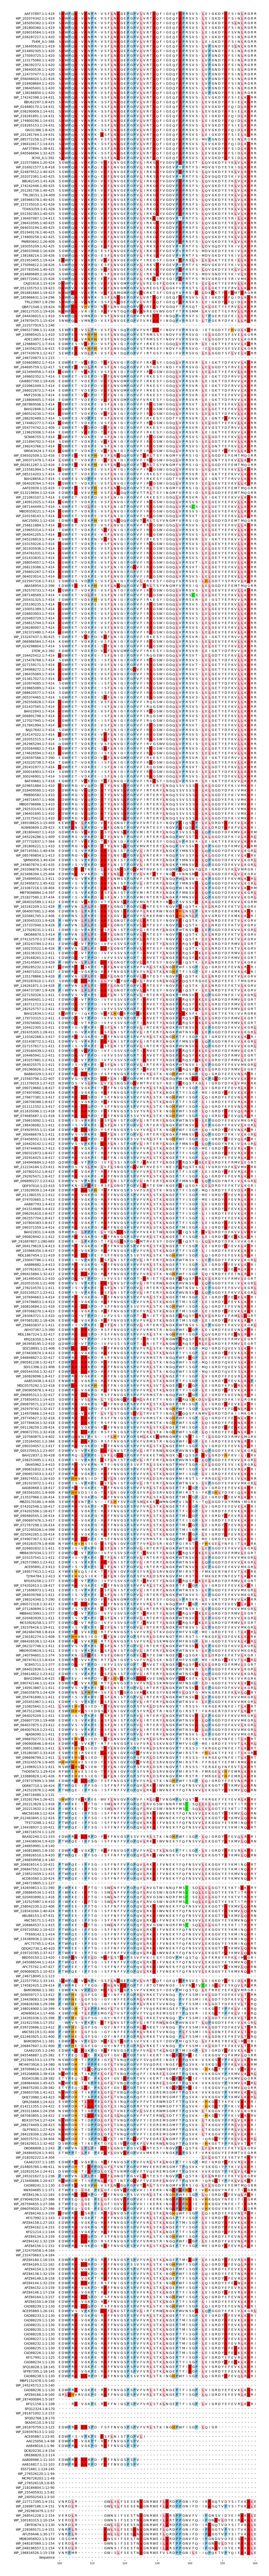

In [27]:
mv = MsaViz(msa_file, start=100, end=160)
mv.set_custom_color_scheme({"A": "red", "P": "skyblue", "C": "lime", "H": "orange", "L": "pink"})
fig = mv.plotfig()